In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os

In [2]:
data=pd.read_csv( r'c:\users\omolade\desktop\hamoye\household_power_consumption.txt', sep=';', low_memory=False)

In [3]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [5]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
year = []
for date in data.Date:
    year.append(int(date[-4:]))

In [7]:
data['Year'] = year

In [8]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006


In [9]:
data["Date"] = pd.to_datetime(data["Date"])

In [10]:
data.set_index( "Date" , inplace= True )

In [11]:
data.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year
Date,,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006
2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006
2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006
2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006
2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006


In [12]:
plt.figure(figsize=( 10 , 6 ))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

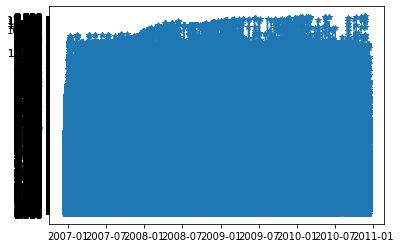

In [18]:
plt.plot(data.index, data.Global_active_power, '--' , marker= '*' , )

In [14]:
#check for missing values
data.isnull().values.any() 

True

In [15]:
#Filling missing data by imputation - Forward fill
data_ffill = data.fillna(method= 'ffill' )

In [16]:
data_ffill.isnull().sum()

Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Year                     0
dtype: int64

In [19]:
#Filling missing data by interpolation
data_LIF = data.interpolate(method= 'linear' , limit_direction= 'forward' )
data_LIF.isnull().sum()
data_LIB = data.interpolate(method= 'linear' , limit_direction= 'backward' )
data_LIB.isnull().sum()

Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Year                     0
dtype: int64

### Downsampling and Upsampling 

In [20]:
#Downsample to quarterly data points
data_monthly = data.resample( '12M' ).mean() 

In [21]:
#Upsample to daily data points
data_daily = data.resample( 'D' ).mean() 